In [686]:
# Importing the necessary libraries
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IGA Data

In [687]:
# Reading the files.
files_IGA = os.path.join(r"C:\Users\asus\Desktop\Trimester_2\Software_Development_Management\Assessment_3\Python_Files\IGA_DATA_NEW", "IGA_DATA_*.csv")
files_IGA = glob.glob(files_IGA)

In [688]:
# Merging the files with concat and opening them with read_csv
df = pd.concat(map(pd.read_csv, files_IGA), ignore_index=True)
print(df)

                                                product             deal  \
0                               Primo Ham Double Smoked         100 Gram   
1                                     7Up Lemonade Soda       1.25 Litre   
2                  Abbott's Bakery Country Grains Bread         800 Gram   
3             Abbott's Bakery Farmhouse Wholemeal Bread         750 Gram   
4          Abbott's Bakery Harvest Seeds & Grains Bread         750 Gram   
...                                                 ...              ...   
1451      Colgate Plax Alcohol Free Mouthwash Freshmint   250 Millilitre   
1452  Colgate Smiles My First Extra Soft Kids Toothb...           1 Each   
1453          Colgate Total Tartar Control Dental Floss              25m   
1454  Colgate Triple Action Cavity Protection Fluori...         110 Gram   
1455  Colgate Twister Deep Cleaning Toothbrush with ...           1 Each   

                                     price                        span  \
0            

In [689]:
# Finding out the shape of our DataFrame
print(df.shape)

(1456, 9)


In [690]:
# Checking the types of the values in the columns
print(df.dtypes)

product     object
deal        object
price       object
span        object
url         object
img         object
store       object
state       object
postcode     int64
dtype: object


In [691]:
df = df.drop(columns=['url', 'img', 'store', 'state', 'postcode'])
print(df)

                                                product             deal  \
0                               Primo Ham Double Smoked         100 Gram   
1                                     7Up Lemonade Soda       1.25 Litre   
2                  Abbott's Bakery Country Grains Bread         800 Gram   
3             Abbott's Bakery Farmhouse Wholemeal Bread         750 Gram   
4          Abbott's Bakery Harvest Seeds & Grains Bread         750 Gram   
...                                                 ...              ...   
1451      Colgate Plax Alcohol Free Mouthwash Freshmint   250 Millilitre   
1452  Colgate Smiles My First Extra Soft Kids Toothb...           1 Each   
1453          Colgate Total Tartar Control Dental Floss              25m   
1454  Colgate Triple Action Cavity Protection Fluori...         110 Gram   
1455  Colgate Twister Deep Cleaning Toothbrush with ...           1 Each   

                                     price                        span  
0             

In [692]:
# Eliminating th $ sign from the values of 'price' column
df['price'] = df['price'].str.replace('$', "")
print(df)

                                                product             deal  \
0                               Primo Ham Double Smoked         100 Gram   
1                                     7Up Lemonade Soda       1.25 Litre   
2                  Abbott's Bakery Country Grains Bread         800 Gram   
3             Abbott's Bakery Farmhouse Wholemeal Bread         750 Gram   
4          Abbott's Bakery Harvest Seeds & Grains Bread         750 Gram   
...                                                 ...              ...   
1451      Colgate Plax Alcohol Free Mouthwash Freshmint   250 Millilitre   
1452  Colgate Smiles My First Extra Soft Kids Toothb...           1 Each   
1453          Colgate Total Tartar Control Dental Floss              25m   
1454  Colgate Triple Action Cavity Protection Fluori...         110 Gram   
1455  Colgate Twister Deep Cleaning Toothbrush with ...           1 Each   

                                     price                        span  
0             

In [693]:
df["price"] = pd.to_numeric(df.price, errors='coerce')

In [694]:
df['span']

0        $3.40 was $3.50$3.40/100g
1           $1.50 was $2.70$1.20/l
2        $4.00 was $6.30$0.50/100g
3        $4.00 was $6.30$0.53/100g
4        $4.00 was $6.30$0.53/100g
                   ...            
1451    $2.50 was $4.50$1.00/100ml
1452               $2.50 was $3.50
1453               $2.50 was $3.50
1454     $2.50 was $3.25$2.27/100g
1455               $2.50 was $3.20
Name: span, Length: 1456, dtype: object

## Calculating the discount rates for each product.

In [695]:
df['span'].astype(str)

0        $3.40 was $3.50$3.40/100g
1           $1.50 was $2.70$1.20/l
2        $4.00 was $6.30$0.50/100g
3        $4.00 was $6.30$0.53/100g
4        $4.00 was $6.30$0.53/100g
                   ...            
1451    $2.50 was $4.50$1.00/100ml
1452               $2.50 was $3.50
1453               $2.50 was $3.50
1454     $2.50 was $3.25$2.27/100g
1455               $2.50 was $3.20
Name: span, Length: 1456, dtype: object

In [696]:
df[['after', 'before']] = df['span'].str.split(' was ', 1, expand=True)

In [697]:
df['before'] = df['before'].str[:5]
print(df)

                                                product             deal  \
0                               Primo Ham Double Smoked         100 Gram   
1                                     7Up Lemonade Soda       1.25 Litre   
2                  Abbott's Bakery Country Grains Bread         800 Gram   
3             Abbott's Bakery Farmhouse Wholemeal Bread         750 Gram   
4          Abbott's Bakery Harvest Seeds & Grains Bread         750 Gram   
...                                                 ...              ...   
1451      Colgate Plax Alcohol Free Mouthwash Freshmint   250 Millilitre   
1452  Colgate Smiles My First Extra Soft Kids Toothb...           1 Each   
1453          Colgate Total Tartar Control Dental Floss              25m   
1454  Colgate Triple Action Cavity Protection Fluori...         110 Gram   
1455  Colgate Twister Deep Cleaning Toothbrush with ...           1 Each   

      price                        span  after before  
0       3.4   $3.40 was $3.50$3

In [698]:
df['after'] = df['after'].str.replace('$', "")
df['before'] = df['before'].str.replace('$', "")

In [699]:
df["after"] = pd.to_numeric(df.after, errors='coerce')
df["before"] = pd.to_numeric(df.before, errors='coerce')

In [700]:
df['discount_rate'] = 100 - ((df['after']/df['before'])*100)
print(df)

                                                product             deal  \
0                               Primo Ham Double Smoked         100 Gram   
1                                     7Up Lemonade Soda       1.25 Litre   
2                  Abbott's Bakery Country Grains Bread         800 Gram   
3             Abbott's Bakery Farmhouse Wholemeal Bread         750 Gram   
4          Abbott's Bakery Harvest Seeds & Grains Bread         750 Gram   
...                                                 ...              ...   
1451      Colgate Plax Alcohol Free Mouthwash Freshmint   250 Millilitre   
1452  Colgate Smiles My First Extra Soft Kids Toothb...           1 Each   
1453          Colgate Total Tartar Control Dental Floss              25m   
1454  Colgate Triple Action Cavity Protection Fluori...         110 Gram   
1455  Colgate Twister Deep Cleaning Toothbrush with ...           1 Each   

      price                        span  after  before  discount_rate  
0       3.4   $

## Sorting the dataframe by discount rates of the producs: From highest to lowest.

In [701]:
df_sorted_by_discount_rate = df.sort_values(by=['discount_rate'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_sorted_by_discount_rate)

product  \
1075                 SUKIN Antibacterial Hand Sanitiser   
860                         Relifeel Hand Sanitiser Gel   
859           ReliFeel Antibacterial Hand Sanitiser Gel   
861                         Relifeel Hand Sanitiser Gel   
423                  M&M'S Peanut Chocolate Singles Bag   
1316                               Bounty Chocolate Bar   
1212                                 Twix Chocolate Bar   
987                              Snickers Chocolate Bar   
424                          M&M's Plain Milk Chocolate   
989                        Snickers White Chocolate Bar   
988                              Snickers Chocolate Bar   
422                          M&M's Minis Chocolate Tube   
858                     Reef Tanning Oil Coconut SPF 30   
1273                 Wiltshire Oblong Pan 33.5cm X 23cm   
1405     Cenovis Vitamin C 250mg Tablets Orange Flavour   
153                       Duck Toilet Fresh Disc Marine   
151                       Duck Toilet Fresh Disc Citrus   
152                     Duck Toilet Fresh Disc Lavender   
328            Kirks Creaming Soda Multipack Cans 375ml   
364   Kirks Sugar Free Creaming Soda Multipack Cans ...   
362   Kirks Originals Olde Stoney Ginger Beer Multip...   
363                   Kirks Pasito Multipack Cans 375ml   
361                      Kirks Lemonade Sugar Free Cans   
329                   Kirks Lemon Squash Multipack Cans   
360                 Kirks Lemonade Multipack Cans 375ml   
365   Kirks Sugar Free Lemon Squash Multipack Cans 3...   
1398                  Cenovis Echinacea 5000mg Capsules   
1400             Cenovis Garlic Horseradish & Vitamin C   
1074                        Suimin Oriental Chicken Cup   
1069                     Suimin Noodle Cup Braised Beef   
1072                  Suimin Noodle Cup Prawn & Chicken   
1073                       Suimin Noodle Cup Spicy Thai   
1071                    Suimin Noodle Cup Curried Prawn   
1067                      Suimin Hot & Spicy Noodle Cup   
1070                          Suimin Noodle Cup Chicken   
1068                        Suimin Mi Goreng Noodle Cup   
778       Powerade Isotonic Mountain Blast Sports Drink   
776            Powerade Isotonic Berry Ice Sports Drink   
1372               Campbell's Real Chicken Liquid Stock   
1015                  Birds Eye Oven Bake Crumbed Lemon   
1433  Cold Power 2in1 Laundry Detergent Powder with ...   
1434  Cold Power Advanced Clean Laundry Detergent Li...   
359                       Arnott's Tim Tam Classic Dark   
358                 Arnott's Tim Tam Chocolate Original   
357     Arnott's Tim Tam Chocolate Biscuits Double Coat   
1436  Cold Power Advanced Clean Laundry Detergent Li...   
1437  Cold Power Advanced Clean Laundry Detergent Po...   
1365                      Cadbury Old Gold Roast Almond   
1016           Birds Eye Oven Bake Crumbed Lemon Pepper   
1439  Cold Power Clean & Fresh Laundry Detergent wit...   
356                      Arnott's Tim Tam Chewy Caramel   
1370                  Campbell's Real Beef Liquid Stock   
1371     Campbell's Real Beef Liquid Stock Salt Reduced   
589            Nescafe Choc Orange Mocha Coffee Sachets   
1373  Campbell's Real Chicken Liquid Stock Salt Reduced   
1009  Biozet Attack Front & Top Loader Regular Laund...   
157   Dynamo Professional 7 in 1 Laundry Detergent L...   
168                          Energizer Max AA Batteries   
169                         Energizer Max AAA Batteries   
179                             Favourites Dark Edition   
1404   Cenovis Sugarless C 500mg Orange Flavour Tablets   
1403                              Cenovis Mega C 1000mg   
1402                                     Cenovis Mega C   
1401                   Cenovis Garlic Immunity Capsules   
1399                                  Cenovis Echinacea   
1397                          Cenovis Cold Sore Complex   
851   Red Rock Deli Sweet Chilli & Sour Cream Deli S...   
840   Red Rock Deli Honey Soy Chicke

## Sorting the dataframe by prices of the products: From highest to lowest.

In [702]:
df_sorted_by_price = df.sort_values(by=['price'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_sorted_by_price)

product  \
1270               Wiltshire Bend N Bake Round Cake Pan   
1276            Wiltshire Stay Sharp Santoku Knife 15cm   
949   Schweppes Solo Thirst Crusher Original Lemon M...   
529         Mountain Dew Energised Multipack Cans 375ml   
766                  Pepsi Max No Sugar Soda 375ml Cans   
938                              Schweppes Lemonade Can   
1092           Sunkist Orange Cans Multipack Cans 375ml   
263       Grinders Coffee Roasters Organic Coffee Beans   
264                                      Grinders Crema   
261                      Grinders Coffee Beans Espresso   
262   Grinders Coffee Roasters Deep & Full Bodied Ri...   
1425                                Coca Cola Diet Cans   
1423                             Coca Cola Classic Cans   
1428                            Coca Cola No Sugar Cans   
1390                  Catsan Crystals Lavender Scented    
588             Nescafe Blend 43 Soluble Instant Coffee   
1028              Sodaking Cylinder Gas Refill Exchange   
1440  Cold Power Clean & Fresh Laundry Detergent wit...   
1438  Cold Power Advanced Clean Laundry Detergent Po...   
1435  Cold Power Advanced Clean Laundry Detergent Li...   
676                         BabyLove Nappy Pants Walker   
674                         BabyLove Nappy Pants Junior   
675                        BabyLove Nappy Pants Toddler   
160   Dynamo Professional Odour Eliminating Laundry ...   
158   Dynamo Professional 7 in 1 Laundry Detergent L...   
1037                  Sorbent Silky White Toilet Tissue   
1242                           Voltaren Emulgel No Mess   
1141          The Market Grocer Macadamias Raw & Salted   
1277            Wiltshire Stay Sharp Utility Knife 13cm   
7                              Ai De Chef Kitchen Timer   
272                          Harris Coffee Beans Smooth   
171                Eveready Gold Alkaline AAA Batteries   
319        Karicare Plus 3 Milk for Toddlers 12+ Months   
265      Guylian Chocolate Selection Belgian Excellence   
273                     Harris Very Strong Coffee Beans   
662                        Aurora Coffee Ground Italian   
872   Sabco Dual Angle Window Washer with Extendable...   
1134  The Market Grocer Cashew & Macadamia Mix Roast...   
1267          Wiltshire Bakeware Enamel Bake Baker 28cm   
48            Community Co Slow Cooked Angus Beef Pie     
119           Dine Wet Cat Food Meat Selection In Gravy   
678    BabyLove Sleepy Nights 4-7 Years Overnight Pants   
41                  Community Co Chicken and Leek Pie     
714                 Ozcare Instant Hand Sanitiser Spray   
318      Just For Men Shampoo In Hair Colour Dark Brown   
611                     Nescafé Blend 43 Instant Coffee   
603                                    Nescafe Espresso   
317                 Just For Men Hair Colour Real Black   
1042  South Cape Orange 3 Cheese Selection Cheese Pl...   
617                                         Nestlé Milo   
185           Fibre Cycle Back to Nature Animal Bedding   
162                Earth Choice All In One Dish Tablets   
869           Sabco 3-in-1 Spray Squeegee Window Washer   
871                            Sabco Domed Cobweb Broom   
1274                  Wiltshire Roast Pan 37cm X 26.5cm   
1143              The Market Grocer Nut Mix Premium Raw   
166                          Energizer Max 9V Batteries   
639   Nurofen Pain and Inflammation Relief Gel 5% Ib...   
819       Provoke Touch Of Silver Intensive Conditioner   
816         Provoke Touch Of Silver Brightening Shampoo   
197                        Frantelle Still Spring Water   
221   GARNIER Olia Permanent Hair Colour 1.0 Deep Black   
79                                 Crisco Sunflower Oil   
222   GARNIER Olia Permanent Hair Colour 4.15 Iced C...   
216                         GARNIER Olia 4.0 Dark Brown   
217                              GARNIER Olia 5.0 Brown   
218                       GARNIER Olia 5.3 Golden Brown   
219                        GARNIER O

## Statistical analysys of the price of the products

In [703]:
# Here, we calculate the three measures of the central tendency of the price: mean, median, and mode.
Central_Tendacy = {}
Central_Tendacy['Mean'] = df['price'].mean()
Central_Tendacy['Median'] = df['price'].median()
Central_Tendacy['Mode'] = df['price'].mode()[0]
print(Central_Tendacy)

{'Mean': 5.059039665970763, 'Median': 4.0, 'Mode': 2.5}


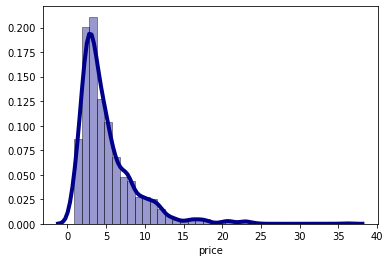

In [704]:
# Here, we plot the histogram of the distribution of the prices of the products.
sns.distplot(df['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

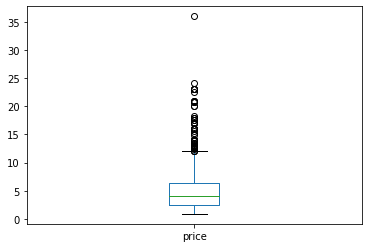

In [705]:
# Here, we create the Boxplot of the prices of the products.
df.boxplot(column =['price'], grid = False)

In [706]:
# Here we calculate measures of dispersion of the prices of the products: range, variance, standard deviation
Measures_of_Dispersion = {}
Measures_of_Dispersion['Range'] = (df['price'].max() - df['price'].min())
Measures_of_Dispersion['Variance'] = df['price'].var()
Measures_of_Dispersion['Standard Deviation'] = df['price'].std()
Measures_of_Dispersion['Mean Absolute Deviation'] = df['price'].mad()
print(Measures_of_Dispersion)

{'Range': 35.14, 'Variance': 13.394690163467228, 'Standard Deviation': 3.6598757032810867, 'Mean Absolute Deviation': 2.610840143362927}


## Statistical analysis of the discount rates of the products

In [707]:
# Here, we calculate the three measures of the central tendency of the discount rate: mean, median, and mode.
Central_Tendacy_DR = {}
Central_Tendacy_DR['Mean'] = df['discount_rate'].mean()
Central_Tendacy_DR['Median'] = df['discount_rate'].median()
Central_Tendacy_DR['Mode'] = df['discount_rate'].mode()[0]
print(Central_Tendacy_DR)

{'Mean': 24.32568211178156, 'Median': 22.033898305084747, 'Mode': 50.0}


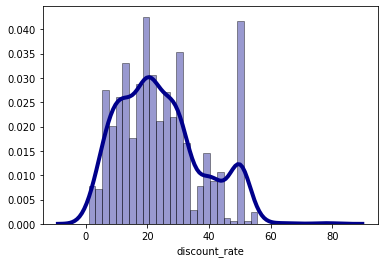

In [708]:
# Here, we plot the histogram of the distribution of the discount rates of the products.
sns.distplot(df['discount_rate'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

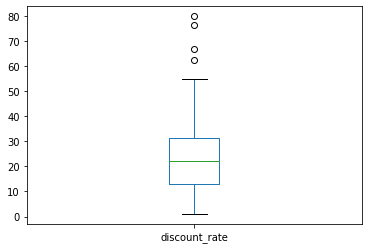

In [709]:
# Here, we create the Boxplot of the discount ratea of the products.
df.boxplot(column =['discount_rate'], grid = False)

In [710]:
# Here we calculate measures of dispersion of the dsicount rates of the products: range, variance, standard deviation
Measures_of_Dispersion_DR = {}
Measures_of_Dispersion_DR['Range'] = (df['discount_rate'].max() - df['discount_rate'].min())
Measures_of_Dispersion_DR['Variance'] = df['discount_rate'].var()
Measures_of_Dispersion_DR['Standard Deviation'] = df['discount_rate'].std()
Measures_of_Dispersion_DR['Mean Absolute Deviation'] = df['discount_rate'].mad()
print(Measures_of_Dispersion_DR)

{'Range': 78.7979797979798, 'Variance': 181.25505979056723, 'Standard Deviation': 13.463099932428907, 'Mean Absolute Deviation': 10.934286182903229}


# Coles Data

In [711]:
# Reading the files.
files_Coles = os.path.join(r"C:\Users\asus\Desktop\Trimester_2\Software_Development_Management\Assessment_3\Python_Files\IGA_DATA_NEW", "coles-s (*).csv")
files_Coles = glob.glob(files_Coles)

In [712]:
# Merging the files with concat and opening them with read_csv
df_coles = pd.concat(map(pd.read_csv, files_Coles), ignore_index=True)
display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
1      1660455519-325  https://shop.coles.com.au/a/national/specials/...   
2      1660455445-294  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
..                ...                                                ...   
283    1660452859-138  https://shop.coles.com.au/a/national/specials/...   
284    1660452813-120  https://shop.coles.com.au/a/national/specials/...   
285    1660452830-126  https://shop.coles.com.au/a/national/specials/...   
286     1660452760-98  https://shop.coles.com.au/a/national/specials/...   
287    1660452818-121  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
1    Campbell's V8 Tropical Juice 1.25L on online o...   
2    McCain Quick Cook Mini Smiles 500g on online o...   
3    Nescafe Farmers Origins Americas Lungo Capsule...   
4    Talley's Mussels Natural 375g on online only s...   
..                                                 ...   
283  Morning Fresh Original Dishwashing Liquid 900m...   
284  Sprite No Sugar Lemonade Soft Drink Multipack ...   
285  Sukin Lime & Coconut Cleansing Hand Wash 500mL...   
286  Schwarzkopf Brilliance L43 Smouldering Red 1 p...   
287  People Hydrate Conditioner 350mL on special ha...   

                                         products-href        product  \
0    https://shop.coles.com.au/a/national/product/w...         Remedy   
1    https://shop.coles.com.au/a/national/product/c...     Campbell's   
2    https://shop.coles.com.au/a/national/product/m...         McCain   
3    https://shop.coles.com.au/a/national/product/n...        Nescafe   
4    https://shop.coles.com.au/a/national/product/t...       Talley's   
..                                                 ...            ...   
283  https://shop.coles.com.au/a/national/product/m...  Morning Fresh   
284  https://shop.coles.com.au/a/national/product/p...         Sprite   
285  https://shop.coles.com.au/a/national/product/s...          Sukin   
286  https://shop.coles.com.au/a/national/product/l...    Schwarzkopf   
287  https://shop.coles.com.au/a/national/product/h...         People   

                                                  desc  \
0                          Kombucha Wild Berry 4X250mL   
1                                    V8 Tropical Juice   
2                               Quick Cook Mini Smiles   
3              Farmers Origins Americas Lungo Capsules   
4                                      Mussels Natural   
..                                                 ...   
283                        Original Dishwashing Liquid   
284  No Sugar Lemonade Soft Drink Multipack Bottles...   
285                 Lime & Coconut Cleansing Hand Wash   
286                     Brilliance L43 Smouldering Red   
287                                Hydrate Conditioner   

                                        image-src  \
0    /wcsstore/Coles-CAS/images/4/2/9/4299698.jpg   
1    /wcsstore/Coles-CAS/images/1/1/6/1165378.jpg   
2    /wcsstore/Coles-CAS/images/4/2/0/4204320.jpg   
3    /wcsstore/Coles-CAS/images/3/8/9/3890571.jpg   
4    /wcsstore/Coles-CAS/images/5/0/3/5032467.jpg   
..                                            ...   
283  /wcsstore/Coles-CAS/images/9/7/3/9736075.jpg   
284  /wcsstore/Coles-CAS/images/5/1/9/5192838.jpg   
285  /wcsstore/Coles-CAS/images/3/5/5/3552149.jpg   
286  /wcsstore/Coles-CAS/images/4/2/5/4256334.jpg   
287  /wcsstore/Coles-CAS/images/4/9/5/4957838.jpg   

                                             price      Detai1lDeal  \
0    $\n\t\t\t\t\t\t\t\t\t6\n\t\t\t\t\t\t\t\t\t.00     $6.00 per 1L   
1    $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t

In [713]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
1      1660455519-325  https://shop.coles.com.au/a/national/specials/...   
2      1660455445-294  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
6      1660455461-301  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
9      1660455473-306  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
11     1660455530-330  https://shop.coles.com.au/a/national/specials/...   
12     1660455545-336  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
14     1660455509-321  https://shop.coles.com.au/a/national/specials/...   
15     1660455547-337  https://shop.coles.com.au/a/national/specials/...   
16     1660455480-309  https://shop.coles.com.au/a/national/specials/...   
17     1660455523-327  https://shop.coles.com.au/a/national/specials/...   
18     1660455506-320  https://shop.coles.com.au/a/national/specials/...   
19     1660455478-308  https://shop.coles.com.au/a/national/specials/...   
20     1660455452-297  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
22     1660455516-324  https://shop.coles.com.au/a/national/specials/...   
23     1660455533-331  https://shop.coles.com.au/a/national/specials/...   
24     1660455504-319  https://shop.coles.com.au/a/national/specials/...   
25     1660455449-296  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
28     1660455475-307  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
32     1660455528-329  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
34     1660455511-322  https://shop.coles.com.au/a/national/specials/...   
35     1660455447-295  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
37     1660455513-323  https://shop.coles.com.au/a/national/specials/...   
38     1660455521-326  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
41     1660455543-335  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
44     1660456123-357  https://shop.coles.com.au/a/national/specials/...   
45     1660456119-355  https://shop.coles.com.au/a/national/specials/...   
46     1660456170-376  https://shop.coles.com.au/a/national/specials/...   
47     1660456153-369  https://shop.coles.com.au/a/national/specials/...   
48     1660456177-379  https://shop.coles.com.au/a/national/specials/...   
49     1660456121-356  https://shop.coles.com.au/a/national/specials/...   
50     1660456160-372  https://shop.coles.com.au/a/national/specials/...   
51     1660456136-362  https://shop.coles.com.au/a/n

In [714]:
print(df_coles.dtypes)

web-scraper-order        object
web-scraper-start-url    object
products                 object
products-href            object
product                  object
desc                     object
image-src                object
price                    object
Detai1lDeal              object
Detail2Deal              object
Deal                     object
save                     object
dtype: object


In [715]:
print(df_coles['price'])

0      $\n\t\t\t\t\t\t\t\t\t6\n\t\t\t\t\t\t\t\t\t.00
1      $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t\t\t\t.60
2      $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t\t\t\t.30
3      $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t\t\t\t.50
4      $\n\t\t\t\t\t\t\t\t\t7\n\t\t\t\t\t\t\t\t\t.00
                           ...                      
283    $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t\t\t\t.50
284    $\n\t\t\t\t\t\t\t\t\t7\n\t\t\t\t\t\t\t\t\t.85
285    $\n\t\t\t\t\t\t\t\t\t4\n\t\t\t\t\t\t\t\t\t.97
286    $\n\t\t\t\t\t\t\t\t\t9\n\t\t\t\t\t\t\t\t\t.00
287    $\n\t\t\t\t\t\t\t\t\t8\n\t\t\t\t\t\t\t\t\t.00
Name: price, Length: 288, dtype: object


In [716]:
df_coles['price'] = df_coles["price"].astype("string")

In [717]:
df_coles['price'].dtype

StringDtype

In [718]:
df_coles['price']

0      $
									6
									.00
1      $
									4
									.60
2      $
									4
									.30
3      $
									4
									.50
4      $
									7
									.00
                 ...            
283    $
									4
									.50
284    $
									7
									.85
285    $
									4
									.97
286    $
									9
									.00
287    $
									8
									.00
Name: price, Length: 288, dtype: string

In [719]:
df_coles['price'] = df_coles['price'].str.replace('$', "")

In [720]:
df_coles['price']

0      
									6
									.00
1      
									4
									.60
2      
									4
									.30
3      
									4
									.50
4      
									7
									.00
                 ...           
283    
									4
									.50
284    
									7
									.85
285    
									4
									.97
286    
									9
									.00
287    
									8
									.00
Name: price, Length: 288, dtype: string

In [721]:
df_coles[['price']] = df_coles['price'].str.split(' ', 1, expand=True)

In [722]:
print(df_coles['price'])

0      
									6
									.00
1      
									4
									.60
2      
									4
									.30
3      
									4
									.50
4      
									7
									.00
                 ...           
283    
									4
									.50
284    
									7
									.85
285    
									4
									.97
286    
									9
									.00
287    
									8
									.00
Name: price, Length: 288, dtype: string


In [723]:
df_coles['price'] = df_coles['price'].str.extract(r'(\d+)').astype('float') + df_coles['price'].str.extract(r'(\.\d\d)').astype('float')

In [724]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles['price'])

0       6.00
1       4.60
2       4.30
3       4.50
4       7.00
5       4.50
6       5.60
7       6.50
8       7.00
9       6.40
10      6.00
11      3.50
12      3.50
13      4.50
14      4.60
15      3.50
16      4.30
17      4.50
18      5.00
19      4.30
20      5.00
21      7.00
22      4.60
23      3.50
24      4.60
25     10.00
26      6.00
27      4.50
28      4.60
29      5.40
30      7.00
31      4.50
32      3.50
33      5.40
34      4.60
35     10.00
36      4.50
37      4.60
38      4.60
39      6.00
40      6.00
41      3.50
42      6.00
43      6.00
44      6.00
45      6.00
46     27.00
47     19.00
48     14.50
49      6.00
50     11.50
51      5.00
52      6.75
53     13.00
54     25.60
55     19.00
56      5.50
57      1.90
58     11.00
59      7.50
60      4.00
61     11.00
62      6.00
63      6.00
64      6.00
65     14.50
66     40.00
67      5.00
68     36.00
69     14.80
70      2.15
71     36.00
72     40.00
73     11.00
74     10.00
75      1.90
76      6.00

In [725]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
1      1660455519-325  https://shop.coles.com.au/a/national/specials/...   
2      1660455445-294  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
6      1660455461-301  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
9      1660455473-306  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
11     1660455530-330  https://shop.coles.com.au/a/national/specials/...   
12     1660455545-336  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
14     1660455509-321  https://shop.coles.com.au/a/national/specials/...   
15     1660455547-337  https://shop.coles.com.au/a/national/specials/...   
16     1660455480-309  https://shop.coles.com.au/a/national/specials/...   
17     1660455523-327  https://shop.coles.com.au/a/national/specials/...   
18     1660455506-320  https://shop.coles.com.au/a/national/specials/...   
19     1660455478-308  https://shop.coles.com.au/a/national/specials/...   
20     1660455452-297  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
22     1660455516-324  https://shop.coles.com.au/a/national/specials/...   
23     1660455533-331  https://shop.coles.com.au/a/national/specials/...   
24     1660455504-319  https://shop.coles.com.au/a/national/specials/...   
25     1660455449-296  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
28     1660455475-307  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
32     1660455528-329  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
34     1660455511-322  https://shop.coles.com.au/a/national/specials/...   
35     1660455447-295  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
37     1660455513-323  https://shop.coles.com.au/a/national/specials/...   
38     1660455521-326  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
41     1660455543-335  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
44     1660456123-357  https://shop.coles.com.au/a/national/specials/...   
45     1660456119-355  https://shop.coles.com.au/a/national/specials/...   
46     1660456170-376  https://shop.coles.com.au/a/national/specials/...   
47     1660456153-369  https://shop.coles.com.au/a/national/specials/...   
48     1660456177-379  https://shop.coles.com.au/a/national/specials/...   
49     1660456121-356  https://shop.coles.com.au/a/national/specials/...   
50     1660456160-372  https://shop.coles.com.au/a/national/specials/...   
51     1660456136-362  https://shop.coles.com.au/a/n

In [726]:
df_coles['save']

0      save\n\t\t\t\t\t\t\t\t\t\t$2.75
1                                  NaN
2                                  NaN
3      save\n\t\t\t\t\t\t\t\t\t\t$1.70
4      save\n\t\t\t\t\t\t\t\t\t\t$0.75
                    ...               
283                                NaN
284                                NaN
285                                NaN
286                                NaN
287                                NaN
Name: save, Length: 288, dtype: object

In [727]:
df_coles = df_coles[df_coles['save'].notna()]

In [728]:
df_coles['save']

0      save\n\t\t\t\t\t\t\t\t\t\t$2.75
3      save\n\t\t\t\t\t\t\t\t\t\t$1.70
4      save\n\t\t\t\t\t\t\t\t\t\t$0.75
5      save\n\t\t\t\t\t\t\t\t\t\t$0.75
7      save\n\t\t\t\t\t\t\t\t\t\t$1.00
                    ...               
191    save\n\t\t\t\t\t\t\t\t\t\t$4.50
192    save\n\t\t\t\t\t\t\t\t\t\t$2.25
193    save\n\t\t\t\t\t\t\t\t\t\t$9.75
194    save\n\t\t\t\t\t\t\t\t\t\t$5.25
195    save\n\t\t\t\t\t\t\t\t\t\t$7.05
Name: save, Length: 121, dtype: object

In [729]:
df_coles['save'] = df_coles["save"].astype("string")

In [730]:
df_coles['save']

0      save
										$2.75
3      save
										$1.70
4      save
										$0.75
5      save
										$0.75
7      save
										$1.00
               ...         
191    save
										$4.50
192    save
										$2.25
193    save
										$9.75
194    save
										$5.25
195    save
										$7.05
Name: save, Length: 121, dtype: string

In [731]:
df_coles['save'] = df_coles['save'].str.extract(r'(\d+)').astype('float') + df_coles['save'].str.extract(r'(\.\d\d)').astype('float')

In [732]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles['save'])

0       2.75
3       1.70
4       0.75
5       0.75
7       1.00
8       0.75
10      2.75
13      1.70
21      0.75
26      2.75
27      1.70
29      2.40
30      2.00
31      1.70
33      2.40
36      1.70
39      2.75
40      2.75
42      2.75
43      2.75
45      6.00
52      6.75
54      2.40
60      0.75
62      6.00
78      0.75
79      6.75
81      2.40
89      1.00
91      1.00
92      4.62
99      1.80
100     1.00
101     4.62
102     4.50
104     4.62
107     1.00
108     9.00
109     7.05
111     1.48
112     5.00
113     7.50
114     3.75
115     1.98
116    10.00
117     9.50
118     3.23
119     3.75
120     4.50
121     9.75
122     2.90
123     3.00
124     2.75
125     2.25
127     9.00
128     4.00
129     9.50
130     2.90
131     2.10
132     5.00
133    11.00
134    18.00
135     2.00
136     3.00
137     7.25
138    12.00
139     5.00
140     9.00
141     9.50
142     1.00
143     4.00
144    13.00
145     3.00
146     5.00
147     7.85
148     1.50
149     1.90

In [733]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
45     1660456119-355  https://shop.coles.com.au/a/national/specials/...   
52     1660456097-346  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
62     1660456116-354  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
79     1660456104-349  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
92     1660456249-396  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
101    1660456253-398  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
104    1660456251-397  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
112    1660456371-408  https://shop.coles.com.au/a/national/specials/...   
113    1660456428-431  https://shop.coles.com.au/a/national/specials/...   
114    1660456358-403  https://shop.coles.com.au/a/national/specials/...   
115    1660456398-419  https://shop.coles.com.au/a/national/specials/...   
116    1660456356-402  https://shop.coles.com.au/a/national/specials/...   
117    1660456413-425  https://shop.coles.com.au/a/national/specials/...   
118    1660456462-445  https://shop.coles.com.au/a/national/specials/...   
119    1660456457-443  https://shop.coles.com.au/a/national/specials/...   
120    1660456452-441  https://shop.coles.com.au/a/national/specials/...   
121    1660456417-427  https://shop.coles.com.au/a/national/specials/...   
122    1660456442-437  https://shop.coles.com.au/a/national/specials/...   
123    1660456376-410  https://shop.coles.com.au/a/n

In [734]:
df_coles = df_coles.loc[df_coles['save'] < df_coles['price']]

In [735]:
df_coles.shape

(36, 12)

In [736]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
3    Nescafe Farmers Origins Americas Lungo Capsule...   
4    Talley's Mussels Natural 375g on online only s...   
5    Coles Caramel Mud Cake 600g on online only spe...   
7         Primo Prosciutto 100g on online only special   
8    Talley's Mussels Chilli 375g on online only sp...   
10   Remedy Kombucha Raspberry 1.25L on online only...   
13   Nescafe Farmers Origins Africa Ristretto Capsu...   
21   Talley's Mussels Garlic 375g on online only sp...   
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
27   Nescafe Farmers Origins India Espresso Capsule...   
29   Table Of Plenty Kefir Lactose Free 1kg on onli...   
30   Udder Delights Adelaide Hills Ash Brie Cheese ...   
31   Nescafe Farmers Origins Brazil Lungo Capsules ...   
33   Table Of Plenty Kefir Natural Yoghurt 1Kg on o...   
36   Nescafe Farmers Origins Colombia Ristretto Dec...   
39   Remedy Kombucha Passionfruit 4X250mL 4 pack on...   
40   Remedy Kombucha Ginger 1.25L on online only sp...   
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
43   Remedy Raspberry Lemonade 

In [737]:
df_coles['discounted_price'] = df_coles['price'] - df_coles['save']

In [738]:
df_coles['discounted_price']

0       3.25
3       2.80
4       6.25
5       3.75
7       5.50
8       6.25
10      3.25
13      2.80
21      6.25
26      3.25
27      2.80
29      3.00
30      5.00
31      2.80
33      3.00
36      2.80
39      3.25
40      3.25
42      3.25
43      3.25
54     23.20
60      3.25
78      3.25
81     23.20
89      1.50
91      1.50
99      5.30
100     1.50
102     7.50
107     1.50
108     2.00
109     0.20
111     0.67
135     1.00
175     2.00
195     0.20
Name: discounted_price, dtype: float64

In [739]:
df_coles['discount_rate'] = 100 - ((df_coles['discounted_price']/df_coles['price'])*100)

In [740]:
df_coles['discount_rate']

0      45.833333
3      37.777778
4      10.714286
5      16.666667
7      15.384615
8      10.714286
10     45.833333
13     37.777778
21     10.714286
26     45.833333
27     37.777778
29     44.444444
30     28.571429
31     37.777778
33     44.444444
36     37.777778
39     45.833333
40     45.833333
42     45.833333
43     45.833333
54      9.375000
60     18.750000
78     18.750000
81      9.375000
89     40.000000
91     40.000000
99     25.352113
100    40.000000
102    37.500000
107    40.000000
108    81.818182
109    97.241379
111    68.837209
135    66.666667
175    81.818182
195    97.241379
Name: discount_rate, dtype: float64

In [741]:
df_coles_sorted_by_discount_rate = df_coles.sort_values(by=['discount_rate'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles_sorted_by_discount_rate)

web-scraper-order                              web-scraper-start-url  \
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
195  Vaseline Intensive Care Aloe Soothe Body Lotio...   
109  Vaseline Intensive Care Deep Restore Body Loti...   
175        Biozet Attack Regular Powder 2kg on special   
108         Biozet Attack Regular Liquid 2L on special   
111  Smith's Crinkle Cut Salt And Vinegar Potato Ch...   
135  Harpic Fresh Power Toilet Cleaner Tropical Blo...   
39   Remedy Kombucha Passionfruit 4X250mL 4 pack on...   
43   Remedy Raspberry Lemonade Organic Kombucha Mul...   
40   Remedy Kombucha Ginger 1.25L on online only sp...   
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
10   Remedy Kombucha Raspberry 1.25L on online only...   
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
29   Table Of Plenty Kefir Lactose Free 1kg on onli...   
33   Table Of Plenty Kefir Natural Yoghurt 1Kg on o...   
107  Whitlocks Baked Beans Fuego Chilli Sauce 420g ...   
100  Whitlocks Baked Beans Smoky Campfire BBQ Sauce...   
91   Whitlocks Baked Beans Fred's Ballistic Tomato ...   
89   F.Whitlocks Makhani Style Baked Beans 420g on ...   
27   Nescafe Farmers Origins In

In [742]:
df_coles_sorted_by_price = df_coles.sort_values(by=['discounted_price'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles_sorted_by_price)

web-scraper-order                              web-scraper-start-url  \
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
81   Bellamy's Organic Step 2 Follow On Infant Form...   
54   Bellamy's Organic Step 1 Infant Formula 900g o...   
102  Coles Grill Lamb Ribs In A Sticky BBQ Rub 750g...   
4    Talley's Mussels Natural 375g on online only s...   
8    Talley's Mussels Chilli 375g on online only sp...   
21   Talley's Mussels Garlic 375g on online only sp...   
7         Primo Prosciutto 100g on online only special   
99   Whole Earth Brown Sugar Replacement 200g on on...   
30   Udder Delights Adelaide Hills Ash Brie Cheese ...   
5    Coles Caramel Mud Cake 600g on online only spe...   
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
39   Remedy Kombucha Passionfruit 4X250mL 4 pack on...   
78   Little Bellies Mini Gingerbread Men 130g on on...   
60   Little Bellies Animal Biscuits 130g on online ...   
43   Remedy Raspberry Lemonade Organic Kombucha Mul...   
40   Remedy Kombucha Ginger 1.25L on online only sp...   
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
10   Remedy Kombucha Raspberry 1.25L on online only...   
33   Table Of Plenty Kefir Natu

## Comparing the overlaps of the products in the two stores (datasets)

In [743]:
df_coles['products'] = df_coles['products'].str.extract(r'(\D+)').astype('string') 

In [744]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
0                          Remedy Kombucha Wild Berry    
3     Nescafe Farmers Origins Americas Lungo Capsules    
4                            Talley's Mussels Natural    
5                              Coles Caramel Mud Cake    
7                                    Primo Prosciutto    
8                             Talley's Mussels Chilli    
10                          Remedy Kombucha Raspberry    
13   Nescafe Farmers Origins Africa Ristretto Capsu...   
21                            Talley's Mussels Garlic    
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
27    Nescafe Farmers Origins India Espresso Capsules    
29                 Table Of Plenty Kefir Lactose Free    
30      Udder Delights Adelaide Hills Ash Brie Cheese    
31      Nescafe Farmers Origins Brazil Lungo Capsules    
33              Table Of Plenty Kefir Natural Yoghurt    
36   Nescafe Farmers Origins Colombia Ristretto Decaf    
39                       Remedy Kombucha Passionfruit    
40                             Remedy Kombucha Ginger    
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
43   Remedy Raspberry Lemonade 

In [745]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

product  \
0                               Primo Ham Double Smoked   
1                                     7Up Lemonade Soda   
2                  Abbott's Bakery Country Grains Bread   
3             Abbott's Bakery Farmhouse Wholemeal Bread   
4          Abbott's Bakery Harvest Seeds & Grains Bread   
5                       Abbott's Bakery Light Rye Bread   
6                    Abbott's Bakery Rustic White Bread   
7                              Ai De Chef Kitchen Timer   
8     Ajax Eco Antibacterial Disinfectant Cleaning W...   
9     Ajax Eco Antibacterial Disinfectant Cleaning W...   
10    Ajax Eco Antibacterial Disinfectant Cleaning W...   
11    Ajax Eco Multipurpose Antibacterial Disinfecta...   
12                                   Allen's Black Cats   
13                 Allen's Chocolate Coated Raspberries   
14                                     Allen's Fantales   
15                                     Allen's Freckles   
16                      Allen's Frogs Alive Lollies Bag   
17                                       Allen's Jaffas   
18                      Allen's Jelly Beans Lollies Bag   
19                               Allen's Killer Pythons   
20                  Allen's Kool Mints Chew Lollies Bag   
21                Allen's Minties Mint Chew Lollies Bag   
22                Allen's Party Mix Lollies Bag Variety   
23                                   Allen's Pineapples   
24                             Allen's Ripe Raspberries   
25                     Allen's Snakes Alive Lollies Bag   
26                            Allen's Sourz Frogs Alive   
27                          Allen's Sourz Tangy Randoms   
28                             Allen's Spearmint Leaves   
29               Allen's Strawberry & Cream Lollies Bag   
30    Colgate Twister Deep Cleaning Toothbrush with ...   
31    Colgate Zig Zag Deep Interdental Clean 25% Rec...   
32    Colgate Zig Zag Deep Interdental Clean Toothbr...   
33    Colgate Zig Zag Deep Interdental Clean Toothbr...   
34    Colgate Zigzag Deep Interdental Clean Toothbru...   
35                   Community Co Al Forno Beef Lasagna   
36                        Community Co Aussie Salad Mix   
37                            Community Co Baby Spinach   
38             Community Co Baby Spinach & Rocket Salad   
39                            Community Co Beef Lasagne   
40                      Community Co Carbonara Rigatoni   
41                  Community Co Chicken and Leek Pie     
42                  Community Co Chicken Tikka and Rice   
43                         Community Co Meat Ball Penne   
44                  Community Co Pesto Chicken Al Forno   
45             Community Co Pumpkin Soup & Paprika Soup   
46                         Community Co Quiche Lorraine   
47                      Community Co Rigatoni Carbonara   
48            Community Co Slow Cooked Angus Beef Pie     
49            Community Co Spinach & Ricotta Cannelloni   
50              Connoisseur Ice Cream Belgian Chocolate   
51                    Connoisseur Ice Cream Cafe Grande   
52        Connoisseur Ice Cream Caramel Honey Macadamia   
53              Connoisseur Ice Cream Chocolate Brownie   
54         Connoisseur Ice Cream Classic Vanilla 1l Tub   
55                Connoisseur Ice Cream Cookies & Cream   
56    Connoisseur Ice Cream Murray River Salted Caramel   
57           Connoisseur Ice Cream Plant Based Hazelnut   
58      Connoisseur Ice Cream Raspberry White Chocolate   
59                    Connoisseur Ice Cream Strawberry    
60        Connoisseur Ice Cream Vanilla Caramel Brownie   
61          Connoisseur Mint With Cookies Ice Cream Tub   
62              Continental Recipe Base Beef Stroganoff   
63              Continental Recipe Base Chow Mein Mince   
64         Continental Recipe Base Creamy Chicken Curry   
65             Continental Recipe Base Curried Sausages   
66                Continental Recipe Base Sheperd's Pie   
67          Continental Recipe Base 

In [746]:
df_coles['products'].isin(df['product']).value_counts()

False    36
Name: products, dtype: int64

In [747]:
food_and_beverages = ['bread', 'Bread', 'grain', 'Grain', 'grains', 'Grains', 'soda', 'Soda', 'soup', 'Soup', 'chocolate', 'Chocolate'
                     'Ice Cream', 'Ice cream', 'ice cream', 'pie', 'Pie', 'Popcorn', 'popcorn', 'oil', 'Oil', 'milk', 'Milk',
                     'Ham', 'ham', 'Salami', 'salami', 'fish', 'Fish', 'Pizza', 'pizza', 'Yoghurt', 'yoghurt', 'water', 'Water',
                     'potato', 'Potato', 'chips', 'Chips', 'tea', 'Tea', 'Coffee', 'coffee', 'cheese', 'Cheese', 'Sausage', 
                     'sausage' 'fruits', 'Fruits', 'Fruit', 'fruit', 'Apple', 'apple', 'Orange', 'orange', 'salmon', 'Salmon',
                     'mayonnaise', 'Mayonnaise', 'pasta', 'Pasta', 'Nescafe', 'nescafe', 'cake', 'Cake', 'beans', 'Beans']
soft_goods_and_consumables = ['Wipes', 'wipes', 'tissue', 'Tissue', 'shampoo', 'Shampoo', 'Conditioner', 'conditioner', 'scrub',
                             'Scrub', 'razor', 'Razor', 'care', 'Care', 'wash', 'Wash', 'soap', 'Soap', 'toilet', 'Toilet', 'cleaning', 
                             'Cleaning', 'toothbrush', 'Toothbrush', 'Led', 'LED', 'bulb', 'Bulb', 'TV', 'Television', 'television',
                             'Sofa', 'sofa', 'lotion', 'Lotion', 'body', 'Body']
medicine = ['Panadol', 'panadol', 'paracetamol', 'Paracetamol', 'Nurofen', 'nurofen', 'Vaseline', 'vaseline']

In [748]:
temp_list_1 = []
counter_1 = 0
while counter_1 < len(df['product']):
    temp_list_1.append(np.nan)
    counter_1 += 1
df['product_type'] = temp_list_1


In [749]:
temp_list_2 = []
counter_2 = 0
while counter_2 < len(df_coles['products']):
    temp_list_2.append(np.nan)
    counter_2 += 1
df_coles['product_type'] = temp_list_2

In [750]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

product  \
0                               Primo Ham Double Smoked   
1                                     7Up Lemonade Soda   
2                  Abbott's Bakery Country Grains Bread   
3             Abbott's Bakery Farmhouse Wholemeal Bread   
4          Abbott's Bakery Harvest Seeds & Grains Bread   
5                       Abbott's Bakery Light Rye Bread   
6                    Abbott's Bakery Rustic White Bread   
7                              Ai De Chef Kitchen Timer   
8     Ajax Eco Antibacterial Disinfectant Cleaning W...   
9     Ajax Eco Antibacterial Disinfectant Cleaning W...   
10    Ajax Eco Antibacterial Disinfectant Cleaning W...   
11    Ajax Eco Multipurpose Antibacterial Disinfecta...   
12                                   Allen's Black Cats   
13                 Allen's Chocolate Coated Raspberries   
14                                     Allen's Fantales   
15                                     Allen's Freckles   
16                      Allen's Frogs Alive Lollies Bag   
17                                       Allen's Jaffas   
18                      Allen's Jelly Beans Lollies Bag   
19                               Allen's Killer Pythons   
20                  Allen's Kool Mints Chew Lollies Bag   
21                Allen's Minties Mint Chew Lollies Bag   
22                Allen's Party Mix Lollies Bag Variety   
23                                   Allen's Pineapples   
24                             Allen's Ripe Raspberries   
25                     Allen's Snakes Alive Lollies Bag   
26                            Allen's Sourz Frogs Alive   
27                          Allen's Sourz Tangy Randoms   
28                             Allen's Spearmint Leaves   
29               Allen's Strawberry & Cream Lollies Bag   
30    Colgate Twister Deep Cleaning Toothbrush with ...   
31    Colgate Zig Zag Deep Interdental Clean 25% Rec...   
32    Colgate Zig Zag Deep Interdental Clean Toothbr...   
33    Colgate Zig Zag Deep Interdental Clean Toothbr...   
34    Colgate Zigzag Deep Interdental Clean Toothbru...   
35                   Community Co Al Forno Beef Lasagna   
36                        Community Co Aussie Salad Mix   
37                            Community Co Baby Spinach   
38             Community Co Baby Spinach & Rocket Salad   
39                            Community Co Beef Lasagne   
40                      Community Co Carbonara Rigatoni   
41                  Community Co Chicken and Leek Pie     
42                  Community Co Chicken Tikka and Rice   
43                         Community Co Meat Ball Penne   
44                  Community Co Pesto Chicken Al Forno   
45             Community Co Pumpkin Soup & Paprika Soup   
46                         Community Co Quiche Lorraine   
47                      Community Co Rigatoni Carbonara   
48            Community Co Slow Cooked Angus Beef Pie     
49            Community Co Spinach & Ricotta Cannelloni   
50              Connoisseur Ice Cream Belgian Chocolate   
51                    Connoisseur Ice Cream Cafe Grande   
52        Connoisseur Ice Cream Caramel Honey Macadamia   
53              Connoisseur Ice Cream Chocolate Brownie   
54         Connoisseur Ice Cream Classic Vanilla 1l Tub   
55                Connoisseur Ice Cream Cookies & Cream   
56    Connoisseur Ice Cream Murray River Salted Caramel   
57           Connoisseur Ice Cream Plant Based Hazelnut   
58      Connoisseur Ice Cream Raspberry White Chocolate   
59                    Connoisseur Ice Cream Strawberry    
60        Connoisseur Ice Cream Vanilla Caramel Brownie   
61          Connoisseur Mint With Cookies Ice Cream Tub   
62              Continental Recipe Base Beef Stroganoff   
63              Continental Recipe Base Chow Mein Mince   
64         Continental Recipe Base Creamy Chicken Curry   
65             Continental Recipe Base Curried Sausages   
66                Continental Recipe Base Sheperd's Pie   
67          Continental Recipe Base 

In [751]:
for i, j in enumerate(df['product']):
    for k in food_and_beverages:
        if k in j:
            df['product_type'][i] = 'Foods and Beverages'

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [752]:
for i2, j2 in enumerate(df_coles['products']):
    for k2 in food_and_beverages:
        if k2 in j2:
            df_coles['product_type'][i2] = 'Foods and Beverages'

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [753]:
for b, c in enumerate(df['product']):
    for d in soft_goods_and_consumables:
        if d in c:
            df['product_type'][b] = 'Soft Goods and Consumables'

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [754]:
for b2, c2 in enumerate(df_coles['products']):
    for d2 in soft_goods_and_consumables:
        if d2 in c2:
            df_coles['product_type'][b2] = 'Soft Goods and Consumables'

In [757]:
for e, f in enumerate(df['product']):
    for g in medicine:
        if g in f:
            df['product_type'][e] = 'Medical Goods'

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [758]:
for e2, f2 in enumerate(df_coles['products']):
    for g2 in medicine:
        if g2 in f2:
            df_coles['product_type'][e2] = 'Medical Goods'

In [759]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

product  \
0                               Primo Ham Double Smoked   
1                                     7Up Lemonade Soda   
2                  Abbott's Bakery Country Grains Bread   
3             Abbott's Bakery Farmhouse Wholemeal Bread   
4          Abbott's Bakery Harvest Seeds & Grains Bread   
5                       Abbott's Bakery Light Rye Bread   
6                    Abbott's Bakery Rustic White Bread   
7                              Ai De Chef Kitchen Timer   
8     Ajax Eco Antibacterial Disinfectant Cleaning W...   
9     Ajax Eco Antibacterial Disinfectant Cleaning W...   
10    Ajax Eco Antibacterial Disinfectant Cleaning W...   
11    Ajax Eco Multipurpose Antibacterial Disinfecta...   
12                                   Allen's Black Cats   
13                 Allen's Chocolate Coated Raspberries   
14                                     Allen's Fantales   
15                                     Allen's Freckles   
16                      Allen's Frogs Alive Lollies Bag   
17                                       Allen's Jaffas   
18                      Allen's Jelly Beans Lollies Bag   
19                               Allen's Killer Pythons   
20                  Allen's Kool Mints Chew Lollies Bag   
21                Allen's Minties Mint Chew Lollies Bag   
22                Allen's Party Mix Lollies Bag Variety   
23                                   Allen's Pineapples   
24                             Allen's Ripe Raspberries   
25                     Allen's Snakes Alive Lollies Bag   
26                            Allen's Sourz Frogs Alive   
27                          Allen's Sourz Tangy Randoms   
28                             Allen's Spearmint Leaves   
29               Allen's Strawberry & Cream Lollies Bag   
30    Colgate Twister Deep Cleaning Toothbrush with ...   
31    Colgate Zig Zag Deep Interdental Clean 25% Rec...   
32    Colgate Zig Zag Deep Interdental Clean Toothbr...   
33    Colgate Zig Zag Deep Interdental Clean Toothbr...   
34    Colgate Zigzag Deep Interdental Clean Toothbru...   
35                   Community Co Al Forno Beef Lasagna   
36                        Community Co Aussie Salad Mix   
37                            Community Co Baby Spinach   
38             Community Co Baby Spinach & Rocket Salad   
39                            Community Co Beef Lasagne   
40                      Community Co Carbonara Rigatoni   
41                  Community Co Chicken and Leek Pie     
42                  Community Co Chicken Tikka and Rice   
43                         Community Co Meat Ball Penne   
44                  Community Co Pesto Chicken Al Forno   
45             Community Co Pumpkin Soup & Paprika Soup   
46                         Community Co Quiche Lorraine   
47                      Community Co Rigatoni Carbonara   
48            Community Co Slow Cooked Angus Beef Pie     
49            Community Co Spinach & Ricotta Cannelloni   
50              Connoisseur Ice Cream Belgian Chocolate   
51                    Connoisseur Ice Cream Cafe Grande   
52        Connoisseur Ice Cream Caramel Honey Macadamia   
53              Connoisseur Ice Cream Chocolate Brownie   
54         Connoisseur Ice Cream Classic Vanilla 1l Tub   
55                Connoisseur Ice Cream Cookies & Cream   
56    Connoisseur Ice Cream Murray River Salted Caramel   
57           Connoisseur Ice Cream Plant Based Hazelnut   
58      Connoisseur Ice Cream Raspberry White Chocolate   
59                    Connoisseur Ice Cream Strawberry    
60        Connoisseur Ice Cream Vanilla Caramel Brownie   
61          Connoisseur Mint With Cookies Ice Cream Tub   
62              Continental Recipe Base Beef Stroganoff   
63              Continental Recipe Base Chow Mein Mince   
64         Continental Recipe Base Creamy Chicken Curry   
65             Continental Recipe Base Curried Sausages   
66                Continental Recipe Base Sheperd's Pie   
67          Continental Recipe Base 

In [760]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles)

web-scraper-order                              web-scraper-start-url  \
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
0                          Remedy Kombucha Wild Berry    
3     Nescafe Farmers Origins Americas Lungo Capsules    
4                            Talley's Mussels Natural    
5                              Coles Caramel Mud Cake    
7                                    Primo Prosciutto    
8                             Talley's Mussels Chilli    
10                          Remedy Kombucha Raspberry    
13   Nescafe Farmers Origins Africa Ristretto Capsu...   
21                            Talley's Mussels Garlic    
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
27    Nescafe Farmers Origins India Espresso Capsules    
29                 Table Of Plenty Kefir Lactose Free    
30      Udder Delights Adelaide Hills Ash Brie Cheese    
31      Nescafe Farmers Origins Brazil Lungo Capsules    
33              Table Of Plenty Kefir Natural Yoghurt    
36   Nescafe Farmers Origins Colombia Ristretto Decaf    
39                       Remedy Kombucha Passionfruit    
40                             Remedy Kombucha Ginger    
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
43   Remedy Raspberry Lemonade 

In [762]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles_sorted_by_discount_rate)

web-scraper-order                              web-scraper-start-url  \
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
195  Vaseline Intensive Care Aloe Soothe Body Lotio...   
109  Vaseline Intensive Care Deep Restore Body Loti...   
175        Biozet Attack Regular Powder 2kg on special   
108         Biozet Attack Regular Liquid 2L on special   
111  Smith's Crinkle Cut Salt And Vinegar Potato Ch...   
135  Harpic Fresh Power Toilet Cleaner Tropical Blo...   
39   Remedy Kombucha Passionfruit 4X250mL 4 pack on...   
43   Remedy Raspberry Lemonade Organic Kombucha Mul...   
40   Remedy Kombucha Ginger 1.25L on online only sp...   
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
10   Remedy Kombucha Raspberry 1.25L on online only...   
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
29   Table Of Plenty Kefir Lactose Free 1kg on onli...   
33   Table Of Plenty Kefir Natural Yoghurt 1Kg on o...   
107  Whitlocks Baked Beans Fuego Chilli Sauce 420g ...   
100  Whitlocks Baked Beans Smoky Campfire BBQ Sauce...   
91   Whitlocks Baked Beans Fred's Ballistic Tomato ...   
89   F.Whitlocks Makhani Style Baked Beans 420g on ...   
27   Nescafe Farmers Origins In

In [763]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_coles_sorted_by_price)

web-scraper-order                              web-scraper-start-url  \
81     1660456167-375  https://shop.coles.com.au/a/national/specials/...   
54     1660456172-377  https://shop.coles.com.au/a/national/specials/...   
102    1660456220-385  https://shop.coles.com.au/a/national/specials/...   
4      1660455468-304  https://shop.coles.com.au/a/national/specials/...   
8      1660455466-303  https://shop.coles.com.au/a/national/specials/...   
21     1660455464-302  https://shop.coles.com.au/a/national/specials/...   
7      1660455471-305  https://shop.coles.com.au/a/national/specials/...   
99     1660456229-389  https://shop.coles.com.au/a/national/specials/...   
30     1660455457-299  https://shop.coles.com.au/a/national/specials/...   
5      1660455526-328  https://shop.coles.com.au/a/national/specials/...   
0      1660455483-310  https://shop.coles.com.au/a/national/specials/...   
39     1660455485-311  https://shop.coles.com.au/a/national/specials/...   
78     1660456158-371  https://shop.coles.com.au/a/national/specials/...   
60     1660456155-370  https://shop.coles.com.au/a/national/specials/...   
43     1660455540-334  https://shop.coles.com.au/a/national/specials/...   
40     1660455487-312  https://shop.coles.com.au/a/national/specials/...   
42     1660455538-333  https://shop.coles.com.au/a/national/specials/...   
26     1660455536-332  https://shop.coles.com.au/a/national/specials/...   
10     1660455490-313  https://shop.coles.com.au/a/national/specials/...   
33     1660455459-300  https://shop.coles.com.au/a/national/specials/...   
29     1660455454-298  https://shop.coles.com.au/a/national/specials/...   
36     1660455492-314  https://shop.coles.com.au/a/national/specials/...   
3      1660455499-317  https://shop.coles.com.au/a/national/specials/...   
13     1660455502-318  https://shop.coles.com.au/a/national/specials/...   
27     1660455497-316  https://shop.coles.com.au/a/national/specials/...   
31     1660455495-315  https://shop.coles.com.au/a/national/specials/...   
108    1660456439-436  https://shop.coles.com.au/a/national/specials/...   
175    1660456758-456  https://shop.coles.com.au/a/national/specials/...   
89     1660456225-387  https://shop.coles.com.au/a/national/specials/...   
91     1660456234-391  https://shop.coles.com.au/a/national/specials/...   
100    1660456232-390  https://shop.coles.com.au/a/national/specials/...   
107    1660456238-392  https://shop.coles.com.au/a/national/specials/...   
135    1660456391-416  https://shop.coles.com.au/a/national/specials/...   
111    1660456447-439  https://shop.coles.com.au/a/national/specials/...   
109    1660456401-420  https://shop.coles.com.au/a/national/specials/...   
195    1660456835-488  https://shop.coles.com.au/a/national/specials/...   

                                              products  \
81   Bellamy's Organic Step 2 Follow On Infant Form...   
54   Bellamy's Organic Step 1 Infant Formula 900g o...   
102  Coles Grill Lamb Ribs In A Sticky BBQ Rub 750g...   
4    Talley's Mussels Natural 375g on online only s...   
8    Talley's Mussels Chilli 375g on online only sp...   
21   Talley's Mussels Garlic 375g on online only sp...   
7         Primo Prosciutto 100g on online only special   
99   Whole Earth Brown Sugar Replacement 200g on on...   
30   Udder Delights Adelaide Hills Ash Brie Cheese ...   
5    Coles Caramel Mud Cake 600g on online only spe...   
0    Remedy Kombucha Wild Berry 4X250mL 4 pack on o...   
39   Remedy Kombucha Passionfruit 4X250mL 4 pack on...   
78   Little Bellies Mini Gingerbread Men 130g on on...   
60   Little Bellies Animal Biscuits 130g on online ...   
43   Remedy Raspberry Lemonade Organic Kombucha Mul...   
40   Remedy Kombucha Ginger 1.25L on online only sp...   
42   Remedy Organic Kombucha Ginger Lemon Drink Mul...   
26   Remedy Organic Kombucha Cherry Plum Multipack ...   
10   Remedy Kombucha Raspberry 1.25L on online only...   
33   Table Of Plenty Kefir Natu

In [764]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df_sorted_by_dicount_rate)

product  \
1075                 SUKIN Antibacterial Hand Sanitiser   
860                         Relifeel Hand Sanitiser Gel   
859           ReliFeel Antibacterial Hand Sanitiser Gel   
861                         Relifeel Hand Sanitiser Gel   
423                  M&M'S Peanut Chocolate Singles Bag   
1316                               Bounty Chocolate Bar   
1212                                 Twix Chocolate Bar   
987                              Snickers Chocolate Bar   
424                          M&M's Plain Milk Chocolate   
989                        Snickers White Chocolate Bar   
988                              Snickers Chocolate Bar   
422                          M&M's Minis Chocolate Tube   
858                     Reef Tanning Oil Coconut SPF 30   
1273                 Wiltshire Oblong Pan 33.5cm X 23cm   
1405     Cenovis Vitamin C 250mg Tablets Orange Flavour   
153                       Duck Toilet Fresh Disc Marine   
151                       Duck Toilet Fresh Disc Citrus   
152                     Duck Toilet Fresh Disc Lavender   
328            Kirks Creaming Soda Multipack Cans 375ml   
364   Kirks Sugar Free Creaming Soda Multipack Cans ...   
362   Kirks Originals Olde Stoney Ginger Beer Multip...   
363                   Kirks Pasito Multipack Cans 375ml   
361                      Kirks Lemonade Sugar Free Cans   
329                   Kirks Lemon Squash Multipack Cans   
360                 Kirks Lemonade Multipack Cans 375ml   
365   Kirks Sugar Free Lemon Squash Multipack Cans 3...   
1398                  Cenovis Echinacea 5000mg Capsules   
1400             Cenovis Garlic Horseradish & Vitamin C   
1074                        Suimin Oriental Chicken Cup   
1069                     Suimin Noodle Cup Braised Beef   
1072                  Suimin Noodle Cup Prawn & Chicken   
1073                       Suimin Noodle Cup Spicy Thai   
1071                    Suimin Noodle Cup Curried Prawn   
1067                      Suimin Hot & Spicy Noodle Cup   
1070                          Suimin Noodle Cup Chicken   
1068                        Suimin Mi Goreng Noodle Cup   
778       Powerade Isotonic Mountain Blast Sports Drink   
776            Powerade Isotonic Berry Ice Sports Drink   
1372               Campbell's Real Chicken Liquid Stock   
1015                  Birds Eye Oven Bake Crumbed Lemon   
1433  Cold Power 2in1 Laundry Detergent Powder with ...   
1434  Cold Power Advanced Clean Laundry Detergent Li...   
359                       Arnott's Tim Tam Classic Dark   
358                 Arnott's Tim Tam Chocolate Original   
357     Arnott's Tim Tam Chocolate Biscuits Double Coat   
1436  Cold Power Advanced Clean Laundry Detergent Li...   
1437  Cold Power Advanced Clean Laundry Detergent Po...   
1365                      Cadbury Old Gold Roast Almond   
1016           Birds Eye Oven Bake Crumbed Lemon Pepper   
1439  Cold Power Clean & Fresh Laundry Detergent wit...   
356                      Arnott's Tim Tam Chewy Caramel   
1370                  Campbell's Real Beef Liquid Stock   
1371     Campbell's Real Beef Liquid Stock Salt Reduced   
589            Nescafe Choc Orange Mocha Coffee Sachets   
1373  Campbell's Real Chicken Liquid Stock Salt Reduced   
1009  Biozet Attack Front & Top Loader Regular Laund...   
157   Dynamo Professional 7 in 1 Laundry Detergent L...   
168                          Energizer Max AA Batteries   
169                         Energizer Max AAA Batteries   
179                             Favourites Dark Edition   
1404   Cenovis Sugarless C 500mg Orange Flavour Tablets   
1403                              Cenovis Mega C 1000mg   
1402                                     Cenovis Mega C   
1401                   Cenovis Garlic Immunity Capsules   
1399                                  Cenovis Echinacea   
1397                          Cenovis Cold Sore Complex   
851   Red Rock Deli Sweet Chilli & Sour Cream Deli S...   
840   Red Rock Deli Honey Soy Chicke

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)